In [12]:
import os
import numpy as np

# Define paths and gesture labels
data_dir = 'data'
gesture_classes = ['no_gesture', 'swipe', 'button_Press']
label_map = {gesture: idx for idx, gesture in enumerate(gesture_classes)}

X = []
y = []

# Load data
for gesture in gesture_classes:
    gesture_path = os.path.join(data_dir, gesture)
    for file in os.listdir(gesture_path):
        if file.endswith('.npy'):
            sample = np.load(os.path.join(gesture_path, file))
            X.append(sample)
            y.append(label_map[gesture])

X = np.array(X)
y = np.array(y)
print(f"Loaded {len(X)} samples. Shape: {X.shape}")


Loaded 600 samples. Shape: (600, 49600)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)


### Option 1: 1D CNN

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

X_train_cnn = X_train.reshape(-1, 49600, 1)
X_test_cnn = X_test.reshape(-1, 49600, 1)


model = Sequential([
    Conv1D(32, kernel_size=5, activation='relu', input_shape=(49600, 1)),
    MaxPooling1D(pool_size=4),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 gesture classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_cnn, y_train, epochs=5, batch_size=16, validation_split=0.2)


Epoch 1/5


c:\Work\Python\NeuralNetwrkOC\radarml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 680ms/step - accuracy: 0.5873 - loss: 2.7828 - val_accuracy: 0.8854 - val_loss: 0.5543
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8596 - loss: 0.5426 - val_accuracy: 0.9167 - val_loss: 0.4970
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9626 - loss: 0.3015 - val_accuracy: 0.9167 - val_loss: 0.4551
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9703 - loss: 0.1046 - val_accuracy: 0.9271 - val_loss: 0.4585
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9819 - loss: 0.0741 - val_accuracy: 0.9271 - val_loss: 0.5221


In [19]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9565 - loss: 0.2566
Test Loss: 0.1827
Test Accuracy: 0.9667


In [20]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test_cnn)
y_pred_classes = y_pred.argmax(axis=1)  # convert from probabilities to class indices

# Print report
print(classification_report(y_test, y_pred_classes, target_names=['no_gesture', 'swipe', 'button_Press']))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
              precision    recall  f1-score   support

  no_gesture       0.91      1.00      0.95        40
       swipe       1.00      0.93      0.96        40
button_Press       1.00      0.97      0.99        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



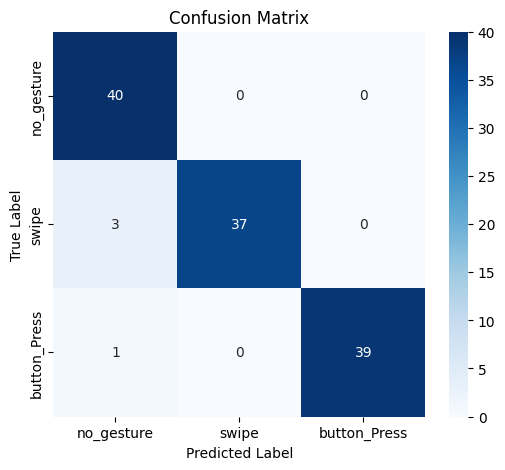

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['no_gesture', 'swipe', 'button_Press'],
            yticklabels=['no_gesture', 'swipe', 'button_Press'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()


### Option 2: Neural Network

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(1024, activation='relu', input_shape=(49600,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.2)


Epoch 1/7


c:\Work\Python\NeuralNetwrkOC\radarml\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.7587 - loss: 7.1173 - val_accuracy: 0.9062 - val_loss: 1.8183
Epoch 2/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.9523 - loss: 1.8398 - val_accuracy: 0.9375 - val_loss: 5.0766
Epoch 3/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 0.9847 - loss: 0.7521 - val_accuracy: 0.9583 - val_loss: 4.1618
Epoch 4/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.9781 - loss: 1.3765 - val_accuracy: 0.9583 - val_loss: 1.6599
Epoch 5/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - accuracy: 0.9770 - loss: 2.0170 - val_accuracy: 0.9583 - val_loss: 1.6525
Epoch 6/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 268ms/step - accuracy: 0.9911 - loss: 0.6983 - val_accuracy: 0.9479 - val_loss: 2.9730
Epoch 7/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - accuracy: 0.9948 - loss: 0.3351 - val_accuracy: 0.9583 - val_loss: 1.7740


In [23]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9656 - loss: 4.3178
Test Loss: 5.2016
Test Accuracy: 0.9583


In [24]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # convert from probabilities to class indices

# Print report
print(classification_report(y_test, y_pred_classes, target_names=['no_gesture', 'swipe', 'button_Press']))


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002820CB90F40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
              precision    recall  f1-score   support

  no_gesture       0.93      0.97      0.95        40
       swipe       1.00      0.93      0.96        40
button_Press       0.95      0.97  

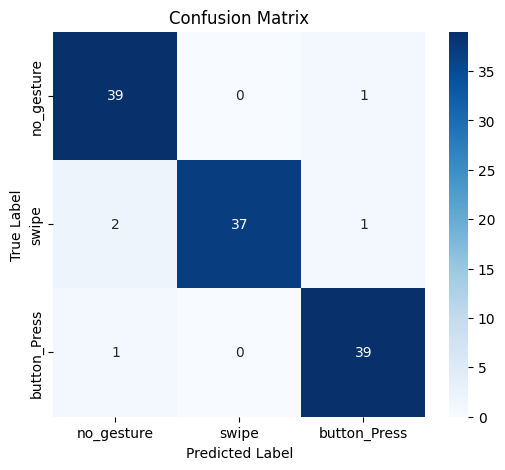

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['no_gesture', 'swipe', 'button_Press'],
            yticklabels=['no_gesture', 'swipe', 'button_Press'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()
